In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!pip install pyarrow

In [5]:
df = pd.read_feather(r"C:\Users\Lenovo\Downloads\Sales_data.ftr")

df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [6]:
df.shape

(186850, 6)

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df = df.dropna(how = "all")

In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
### Which is the best month for Sale:::

In [14]:
df["Order Date"][0]

'04/19/19 08:46'

In [15]:
df["Order Date"][0].split(sep = "/")[0]

'04'

In [16]:
df["Month"] = df["Order Date"].apply(lambda x : x.split(sep = "/")[0])

In [17]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [18]:
df["Month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [19]:
filter1 = df["Month"] == 'Order Date'

In [20]:
df = df[~filter1]

In [21]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
df["Month"]  = df["Month"].astype(int)

In [23]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [24]:
df["Quantity Ordered"]  = df["Quantity Ordered"].astype(int)
df["Price Each"]  = df["Price Each"].astype(float)

In [25]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [26]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

<Axes: xlabel='Month'>

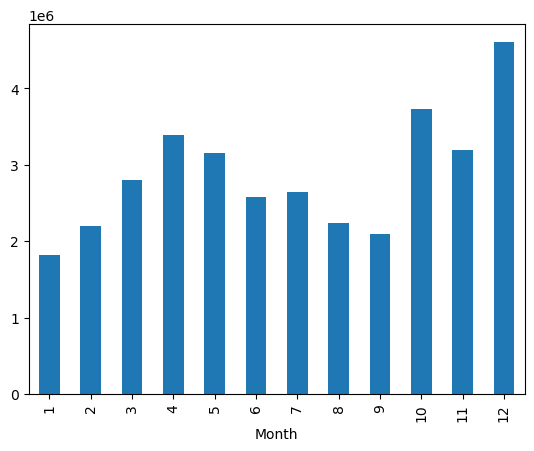

In [27]:
df.groupby("Month")["Sales"].sum().plot(kind = "bar")

In [28]:
## Which city has maximum order

In [29]:
 ### Getting the city name from the data
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [30]:
df["City"] = df["Purchase Address"].str.split(",").str.get(1)

In [31]:
#df.groupby("City")["Quantity Ordered"].count()

In [32]:
pd.value_counts(df["City"])

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

<Axes: ylabel='City'>

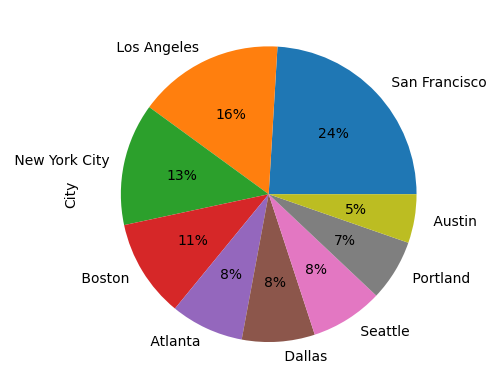

In [33]:
# Visualizing this data into piechart
pd.value_counts(df["City"]).plot(kind = "pie",autopct = "%1.0f%%")

In [34]:
### What product sold the most and why? ####

In [38]:
count_df = df.groupby(["Product"]).agg({"Quantity Ordered":"sum","Price Each":"mean"})

In [39]:
count_df = count_df.reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [53]:
product = count_df["Product"].values

Text(0, 0.5, 'Average Price of Product')

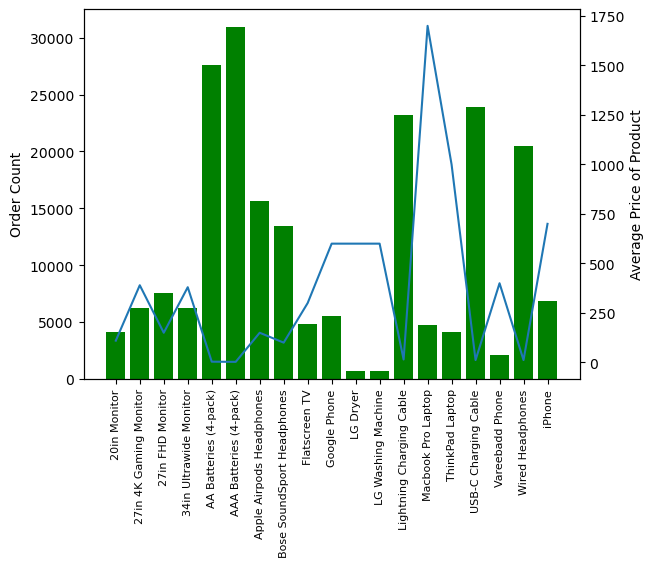

In [59]:
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(count_df["Product"],count_df["Quantity Ordered"],color = "g")
ax2.plot(count_df["Product"],count_df["Price Each"])
ax1.set_xticklabels(product,rotation = "vertical" , fontsize = 8)

ax1.set_ylabel("Order Count")
ax2.set_ylabel("Average Price of Product")

In [ ]:
## Understanding the trend of the most sold Product ##

In [65]:
df["Product"].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [67]:
most_sold_products = df["Product"].value_counts()[0:5].index

In [68]:
df["Product"].isin(most_sold_products)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [70]:
df[df["Product"].isin(most_sold_products)].head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [74]:
most_sold_product_df = df[df["Product"].isin(most_sold_products)]

In [77]:
pivot_df = most_sold_product_df.groupby(["Month","Product"]).size().unstack()

In [78]:
pivot_df

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

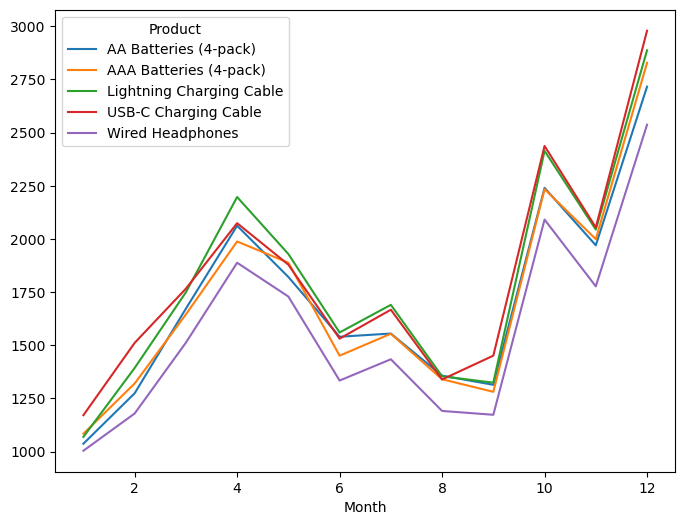

In [80]:
pivot_df.plot(figsize = (8,6))

In [81]:
### What Products are most often sold together:::

In [86]:
df.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


In [91]:
## Keeping the Duplicated Order ids

dup_df = df[df["Order ID"].duplicated(keep = False)]
dup_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles


In [100]:
dup_product = dup_df.groupby(["Order ID"])["Product"].apply(lambda x: ",".join(x)).reset_index().rename(columns = {"Product":"Grouped_Products"})

In [101]:
dup_product

,Order ID,Grouped_Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [103]:
dup_product["Grouped_Products"].value_counts()

iPhone,Lightning Charging Cable                                                886
Google Phone,USB-C Charging Cable                                              857
iPhone,Wired Headphones                                                        361
Vareebadd Phone,USB-C Charging Cable                                           312
Google Phone,Wired Headphones                                                  303
                                                                              ... 
iPhone,Google Phone                                                              1
Vareebadd Phone,27in FHD Monitor                                                 1
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable            1
Vareebadd Phone,Lightning Charging Cable                                         1
Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones      1
Name: Grouped_Products, Length: 350, dtype: int64

In [112]:
dup_df_1 = dup_df.merge(dup_product, how="left", on = "Order ID")

In [113]:
non_dup_df = dup_df_1.drop_duplicates(subset = ["Order ID"])

In [114]:
non_dup_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped_Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


<Axes: ylabel='Grouped_Products'>

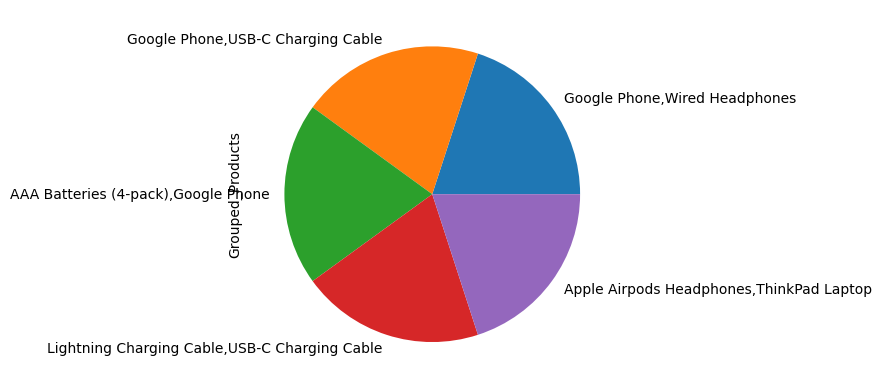

In [119]:
non_dup_df["Grouped_Products"][0:5].value_counts().plot.pie()